<a href="https://www.kaggle.com/code/yasinsoylu123/car-pred-price?scriptVersionId=124230108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


In [2]:
path = r'/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv'
df = pd.read_csv(path)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [3]:
df=df[['model','year','transmission','fuelType','mileage','tax','mpg','engineSize','price']]
df

,model,year,transmission,fuelType,mileage,tax,mpg,engineSize,price
0,A1,2017,Manual,Petrol,15735,150,55.4,1.4,12500
1,A6,2016,Automatic,Diesel,36203,20,64.2,2.0,16500
2,A1,2016,Manual,Petrol,29946,30,55.4,1.4,11000
3,A4,2017,Automatic,Diesel,25952,145,67.3,2.0,16800
4,A3,2019,Manual,Petrol,1998,145,49.6,1.0,17300
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,Manual,Petrol,4018,145,49.6,1.0,16999
10664,A3,2020,Manual,Petrol,1978,150,49.6,1.0,16999
10665,A3,2020,Manual,Petrol,609,150,49.6,1.0,17199
10666,Q3,2017,Automatic,Petrol,8646,150,47.9,1.4,19499


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   transmission  10668 non-null  object 
 3   fuelType      10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   tax           10668 non-null  int64  
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
 8   price         10668 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
df['year'] = df['year'].astype(object)


In [6]:
df.isnull().sum()


model           0
year            0
transmission    0
fuelType        0
mileage         0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

In [7]:
df.dtypes


model            object
year             object
transmission     object
fuelType         object
mileage           int64
tax               int64
mpg             float64
engineSize      float64
price             int64
dtype: object

In [8]:
df.corr()["price"].sort_values()


mpg          -0.600334
mileage      -0.535357
tax           0.356157
engineSize    0.591262
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='fuelType'>

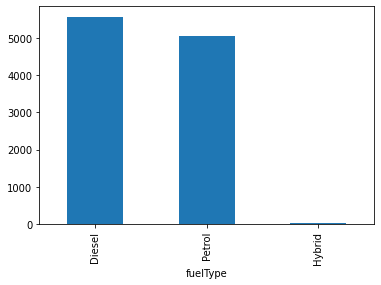

In [9]:
df.value_counts(df["fuelType"]).plot.bar()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transmission', ylabel='count'>

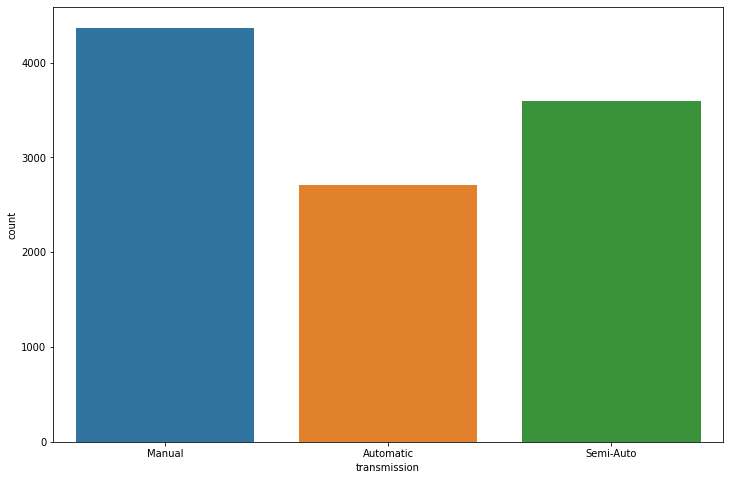

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(df["transmission"])


<AxesSubplot:xlabel='model', ylabel='count'>

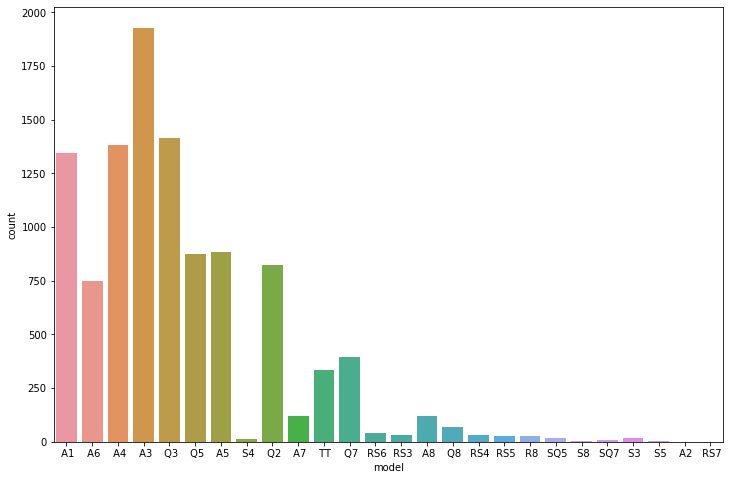

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x = df["model"].T )

<AxesSubplot:xlabel='year', ylabel='count'>

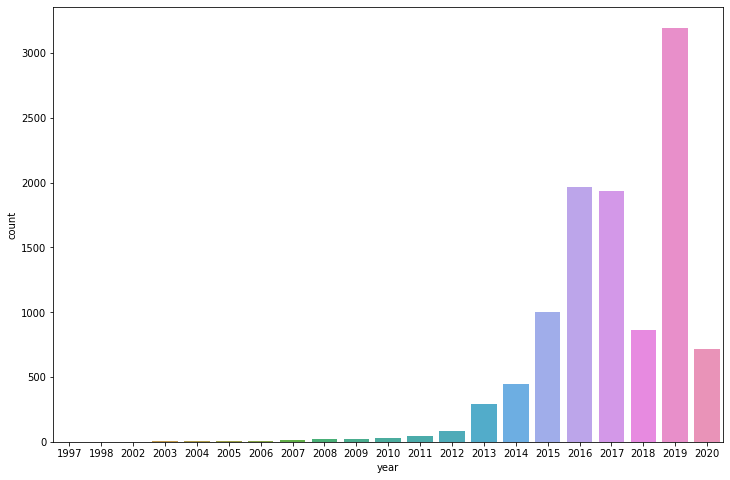

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x = df["year"].T )

<AxesSubplot:xlabel='year', ylabel='price'>

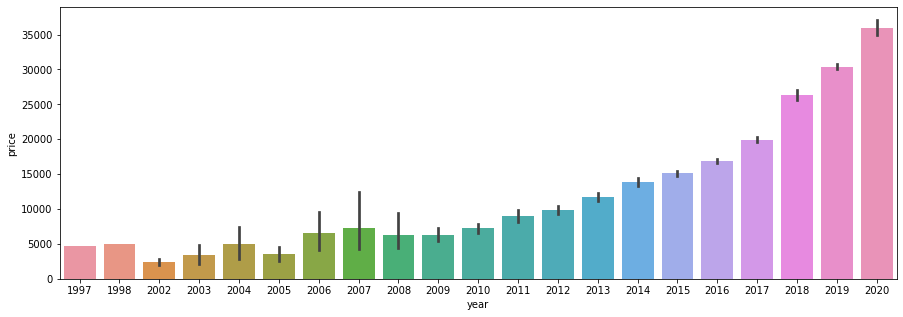

In [13]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.barplot(x = df["year"], y = df["price"])

<AxesSubplot:xlabel='year', ylabel='price'>

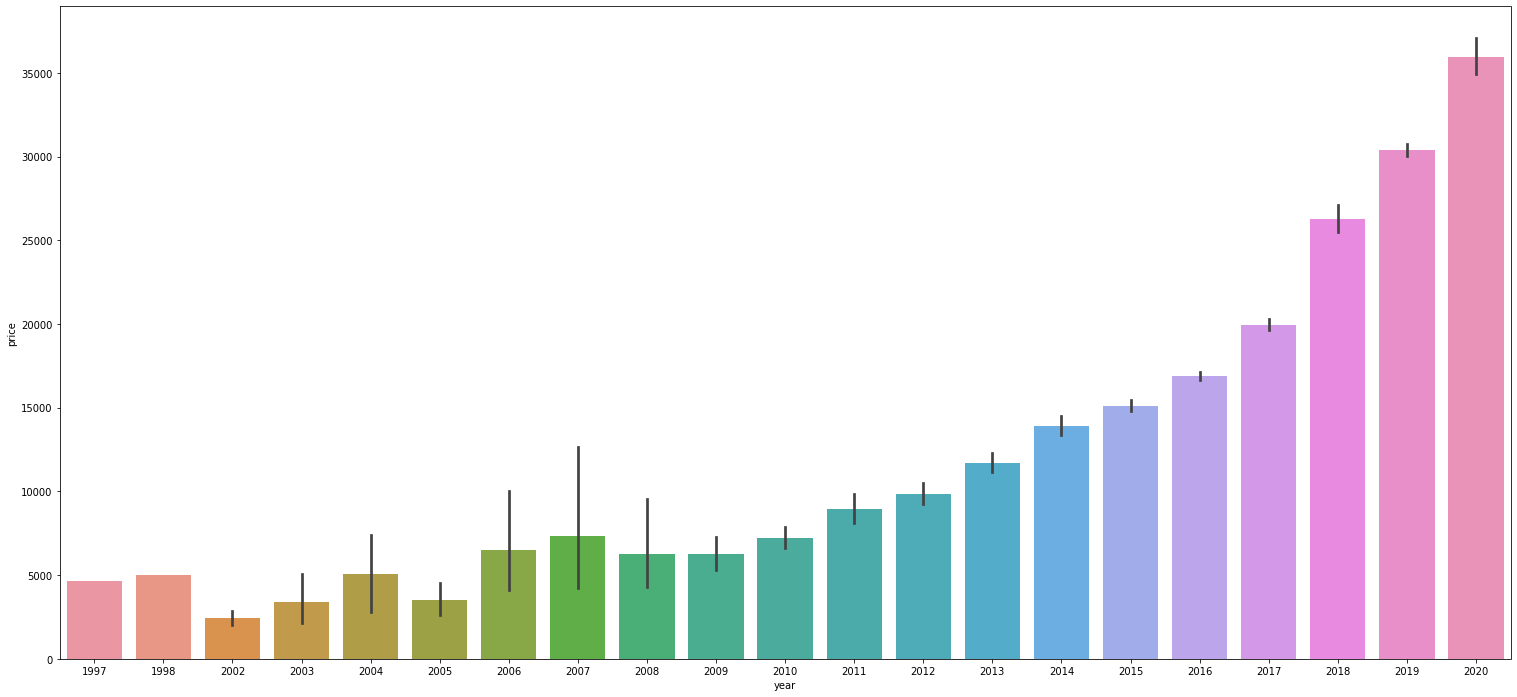

In [14]:
plt.figure(figsize=(26,12),facecolor='w') 
sns.barplot(x = df["year"], y = df["price"])

<AxesSubplot:xlabel='year', ylabel='price'>

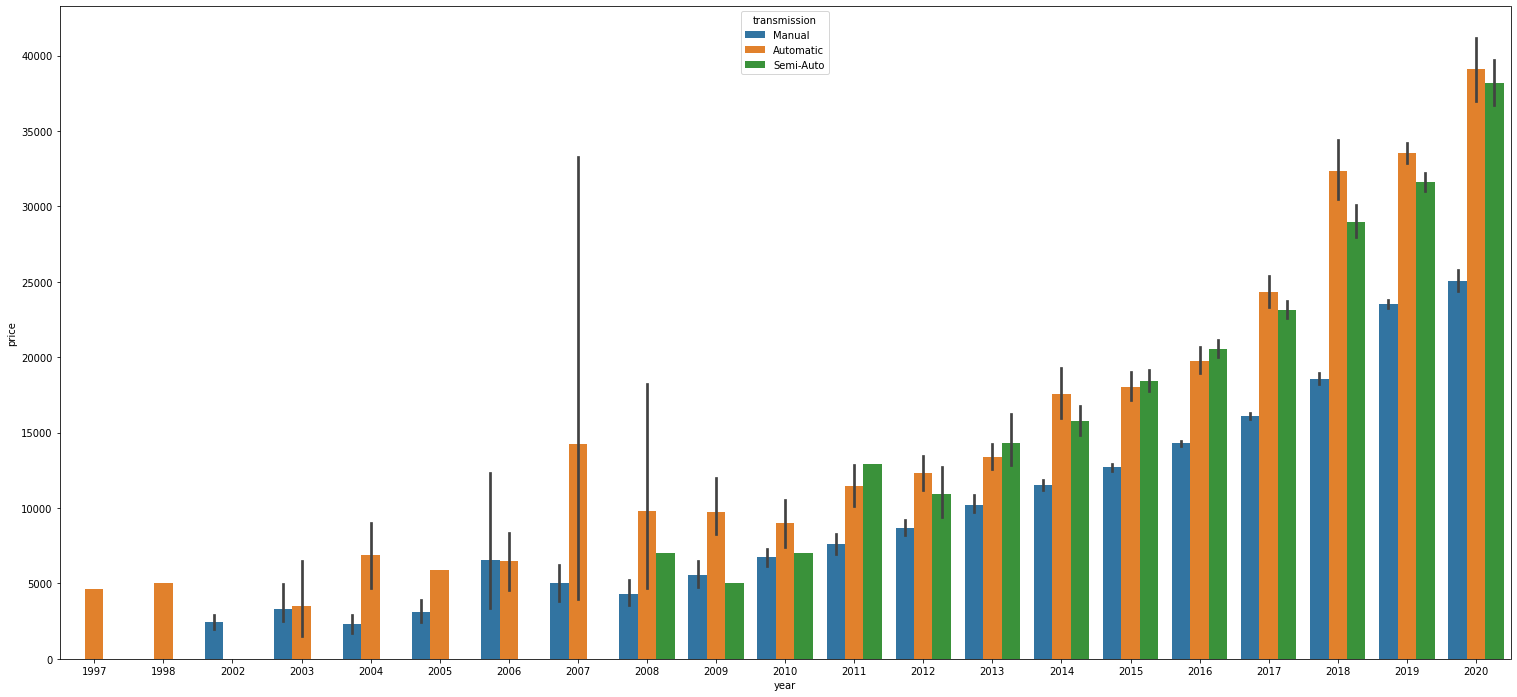

In [15]:
plt.figure(figsize=(26,12),facecolor='w') 
sns.barplot(x = df["year"], y = df["price"] ,hue=df["transmission"])

<AxesSubplot:xlabel='year', ylabel='price'>

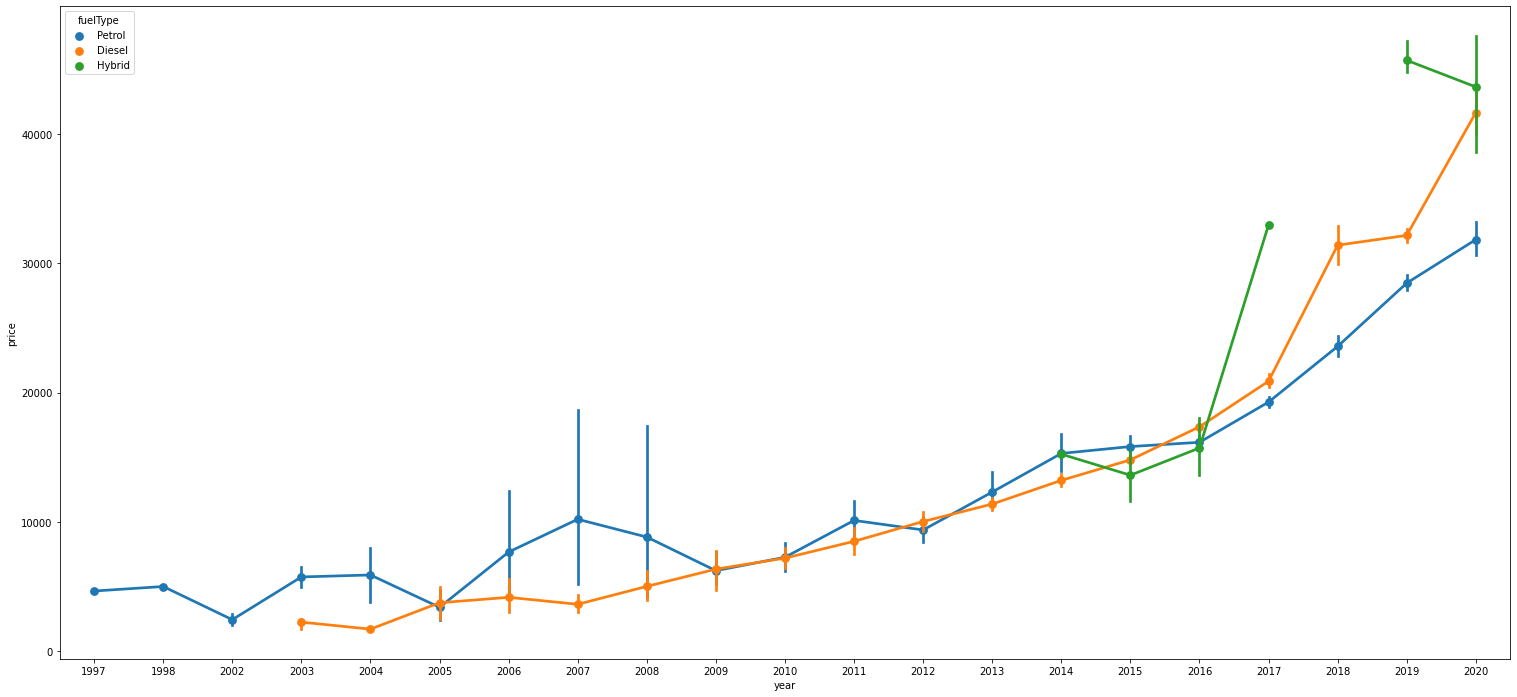

In [16]:
plt.figure(figsize=(26,12),facecolor='w') 
sns.pointplot(x = df["year"], y = df["price"] ,hue=df["fuelType"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mileage', ylabel='price'>

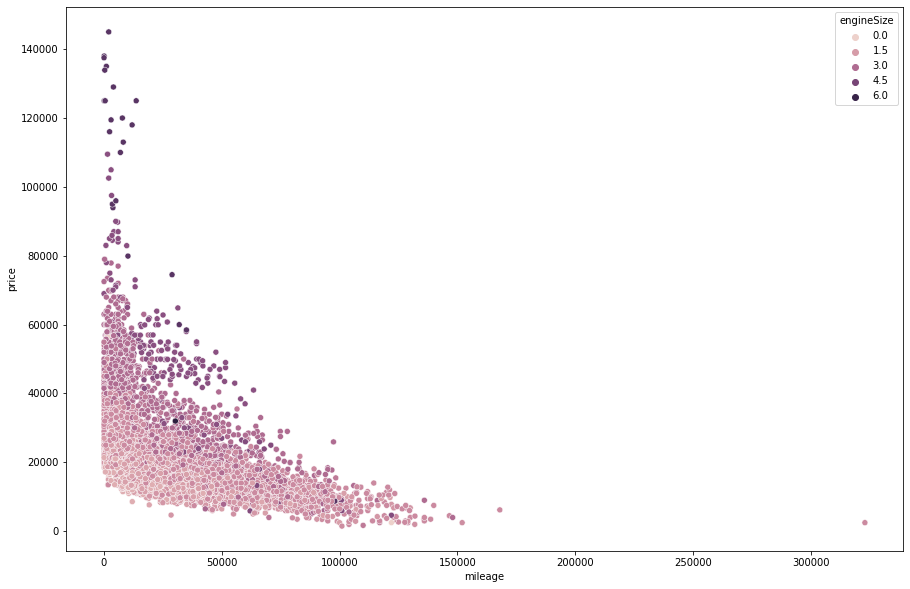

In [17]:
plt.figure(figsize=(15,10)) 
sns.scatterplot(df["mileage"], df["price"], hue = df["engineSize"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mileage', ylabel='price'>

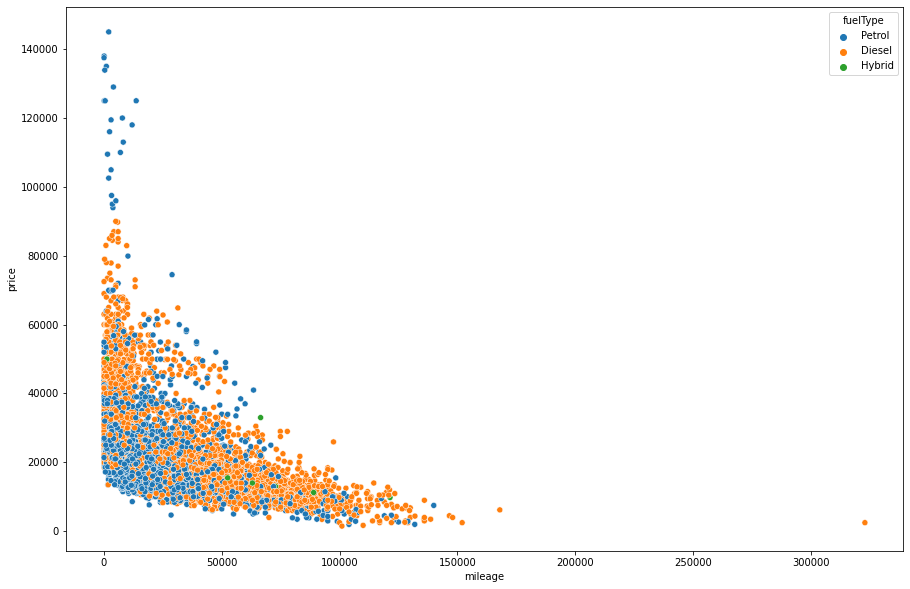

In [18]:
plt.figure(figsize=(15,10)) 
sns.scatterplot(df["mileage"], df["price"], hue = df["fuelType"])

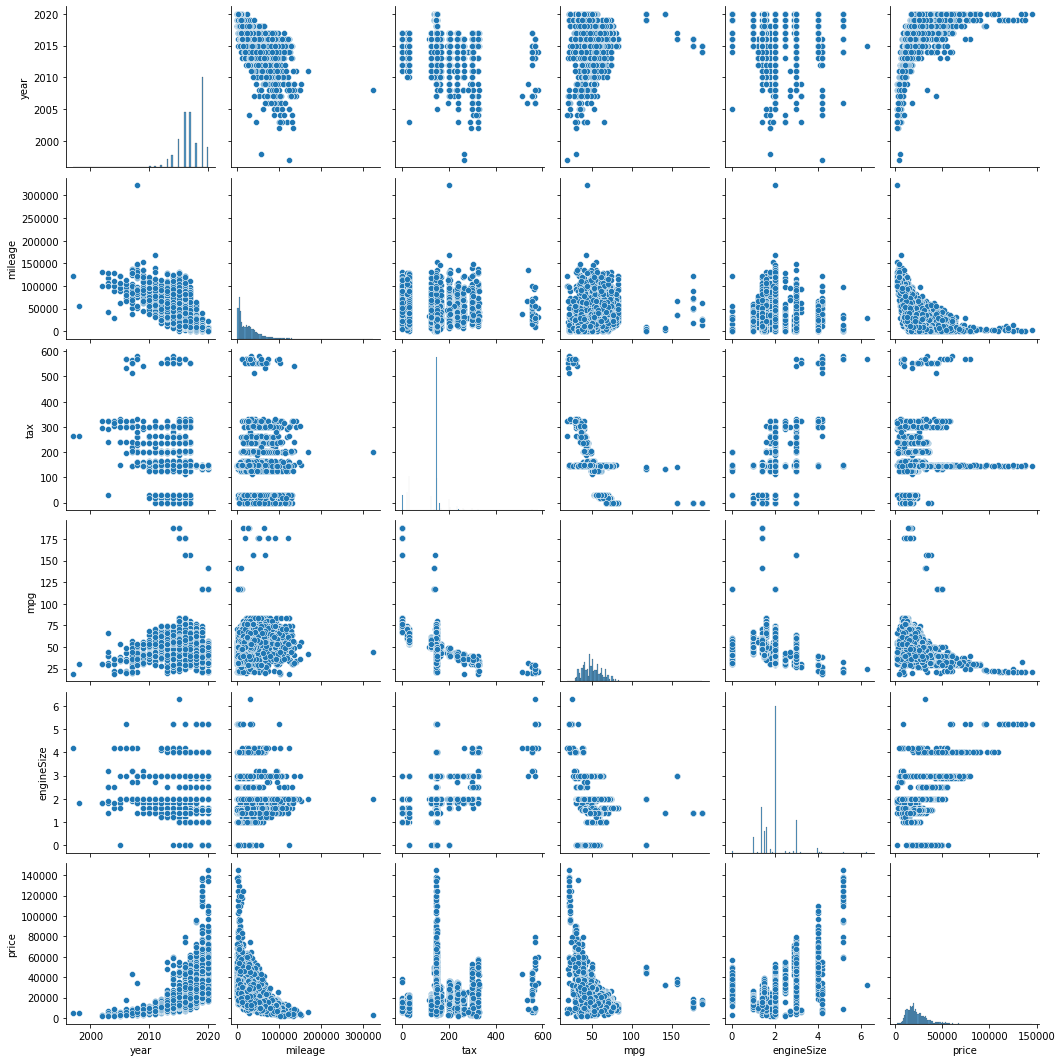

In [19]:
sns.pairplot(df)


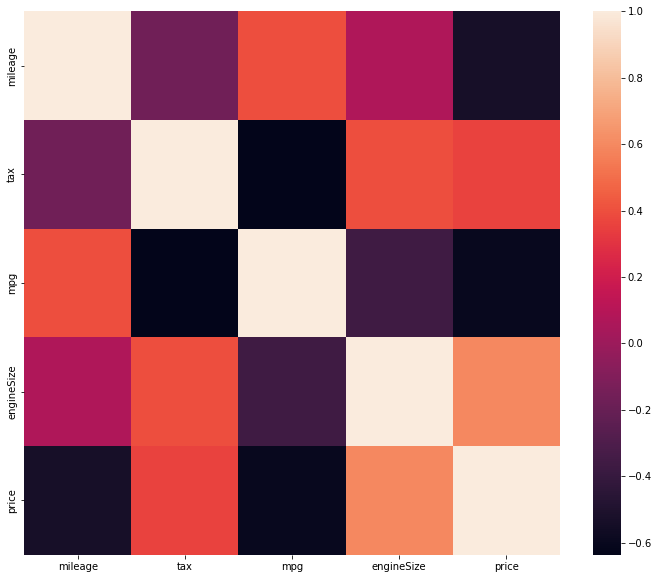

In [20]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(df.corr())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


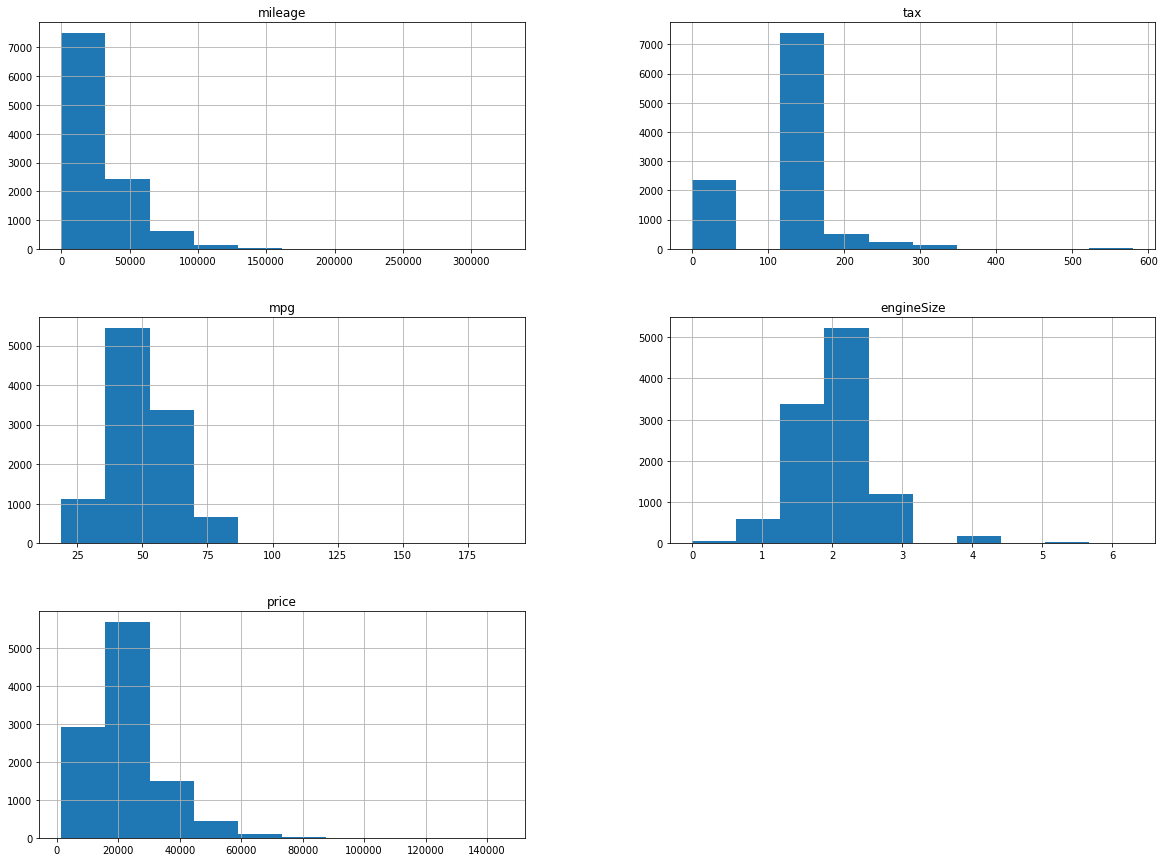

In [21]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

<AxesSubplot:xlabel='year', ylabel='mileage'>

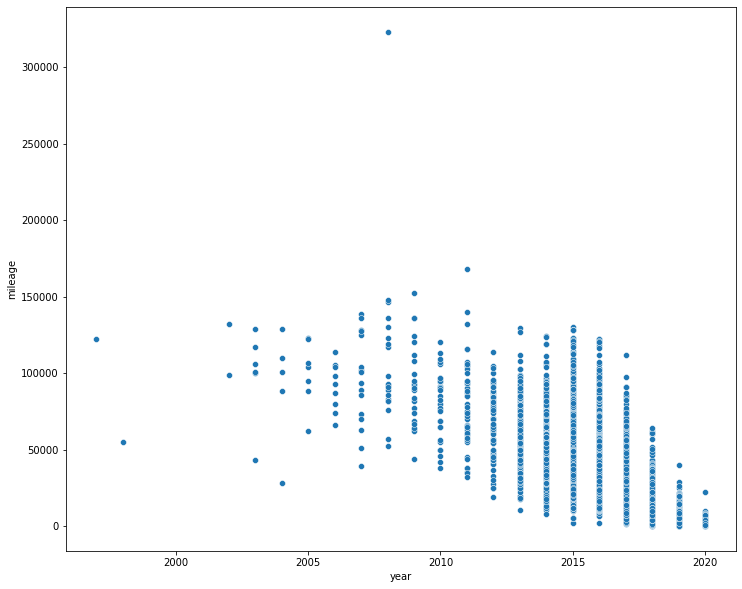

In [22]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = df["year"], y = df["mileage"])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


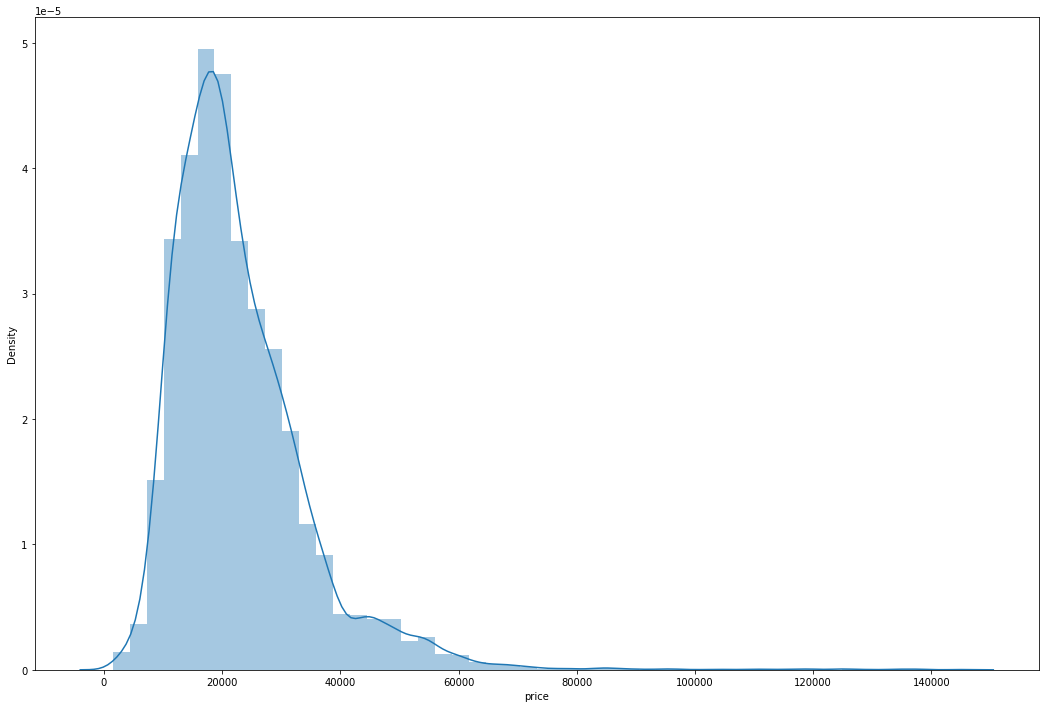

In [23]:
plt.figure(figsize=(18,12))
sns.distplot(df["price"])
plt.show()

In [24]:
df["age_car"] = 2021 - df["year"]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


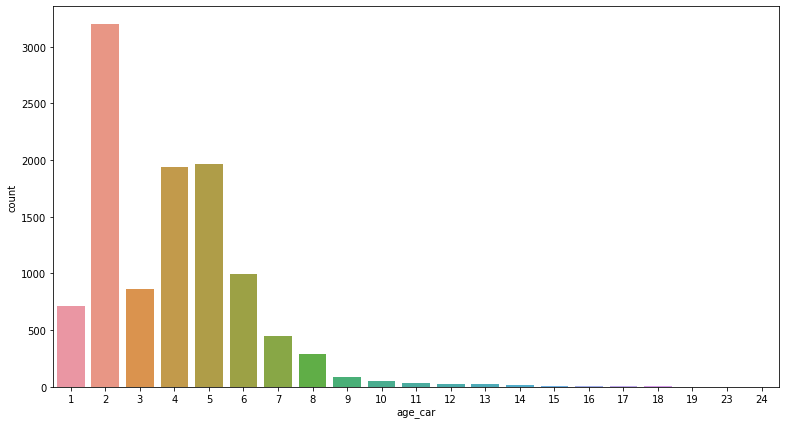

In [25]:
plt.figure(figsize=(13,7))
sns.countplot(df.age_car)
plt.show()

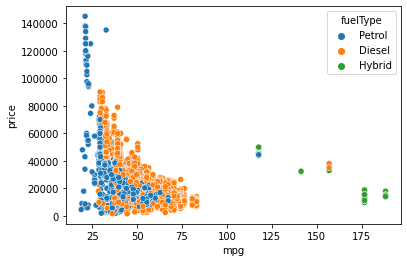

In [26]:
sns.scatterplot(y='price', x='mpg', data=df, hue='fuelType')
plt.show()

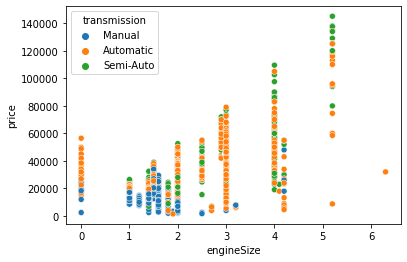

In [27]:
sns.scatterplot(y='price', x='engineSize', data=df, hue='transmission')
plt.show()

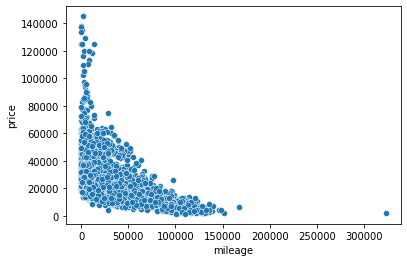

In [28]:
sns.scatterplot(y='price', x='mileage', data=df)
plt.show()

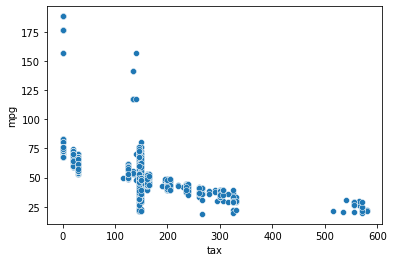

In [29]:
sns.scatterplot(y='mpg', x='tax', data=df)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

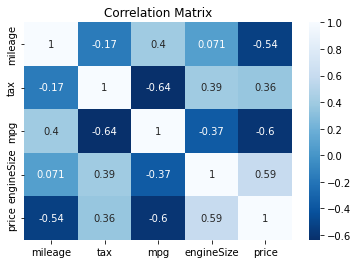

In [30]:
sns.heatmap(df.corr(), cmap='Blues_r', annot=True)
plt.title('Correlation Matrix')

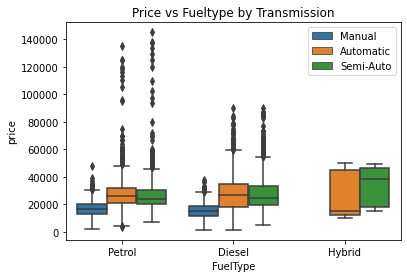

In [31]:
sns.boxplot(x='fuelType', y='price', data=df, hue='transmission');
plt.xlabel('FuelType');
plt.legend(loc='upper right')
plt.title('Price vs Fueltype by Transmission');

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  object 
 2   transmission  10668 non-null  object 
 3   fuelType      10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   tax           10668 non-null  int64  
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
 8   price         10668 non-null  int64  
 9   age_car       10668 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 833.6+ KB


In [33]:
df["age_car"] = df["age_car"].astype(str).astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  object 
 2   transmission  10668 non-null  object 
 3   fuelType      10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   tax           10668 non-null  int64  
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
 8   price         10668 non-null  int64  
 9   age_car       10668 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 833.6+ KB


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import iqr

In [36]:
def plots(df,col):
    fig, ax = plt.subplots(1, 2, figsize=(6,4))
    ax[0].hist(df[col])
    ax[0].set_title(col + ' hist')
    ax[1].boxplot(df[col])
    ax[1].set_title(col + ' boxplot')
    plt.show()

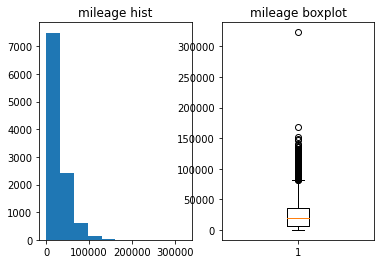

In [37]:
plots(df, 'mileage')


In [38]:
upper_limit = df['mileage'].quantile(0.99)
lower_limit = df['mileage'].quantile(0.01)

In [39]:
new_df = df[(df['mileage'] <= upper_limit) & (df['mileage'] >=lower_limit)]


In [40]:
new_df

,model,year,transmission,fuelType,mileage,tax,mpg,engineSize,price,age_car
0,A1,2017,Manual,Petrol,15735,150,55.4,1.4,12500,4
1,A6,2016,Automatic,Diesel,36203,20,64.2,2.0,16500,5
2,A1,2016,Manual,Petrol,29946,30,55.4,1.4,11000,5
3,A4,2017,Automatic,Diesel,25952,145,67.3,2.0,16800,4
4,A3,2019,Manual,Petrol,1998,145,49.6,1.0,17300,2
...,...,...,...,...,...,...,...,...,...,...
10663,A3,2020,Manual,Petrol,4018,145,49.6,1.0,16999,1
10664,A3,2020,Manual,Petrol,1978,150,49.6,1.0,16999,1
10665,A3,2020,Manual,Petrol,609,150,49.6,1.0,17199,1
10666,Q3,2017,Automatic,Petrol,8646,150,47.9,1.4,19499,4


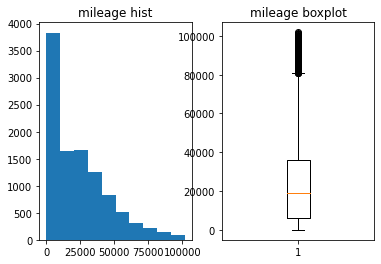

In [41]:
plots(new_df, 'mileage')


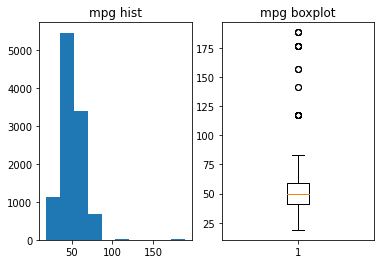

In [42]:
plots(df, 'mpg')


In [43]:
upper_limit = df['mpg'].quantile(0.99)
lower_limit = df['mpg'].quantile(0.01)

In [44]:
new_df = df[(df['mpg'] <= upper_limit) & (df['mpg'] >=lower_limit)]

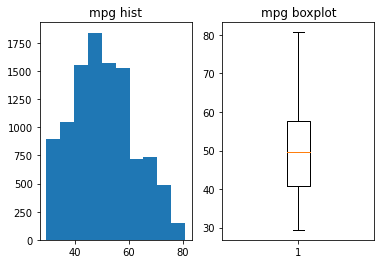

In [45]:
plots(new_df, 'mpg')


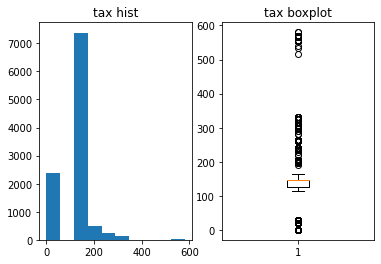

In [46]:
plots(df, 'tax')

In [47]:
new_df = df[(df['tax'] <= 180) & (df['tax'] >=70)]

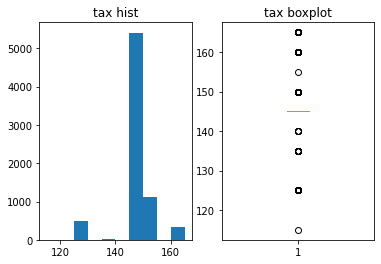

In [48]:
plots(new_df, 'tax')

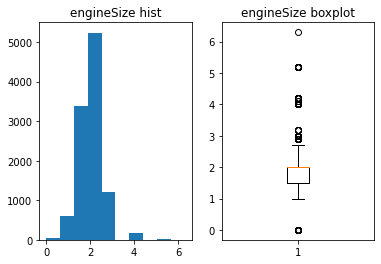

In [49]:
plots(df, 'engineSize')


In [50]:
new_df =  df[df['engineSize'] < 3]

In [51]:
new_df =  df[df['engineSize'] >1]

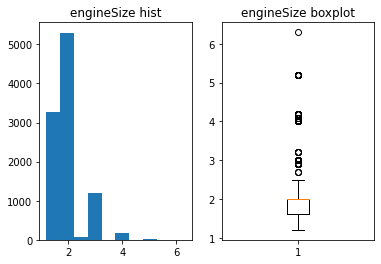

In [52]:
plots(new_df, 'engineSize')

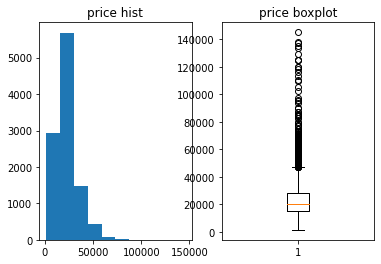

In [53]:
plots(df, 'price')


In [54]:
upper_limit = df['price'].quantile(0.99)
lower_limit = df['price'].quantile(0.01)

In [55]:
new_df = df[(df['price'] <= upper_limit) & (df['price'] >=lower_limit)]

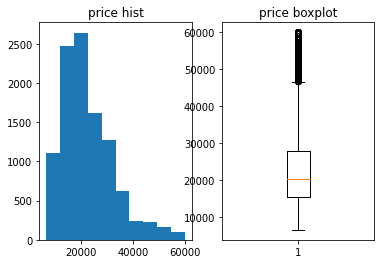

In [56]:
plots(new_df, 'price')

In [57]:
new_df=pd.get_dummies(new_df, drop_first=True)
new_df.head()

,mileage,tax,mpg,engineSize,price,age_car,model_ A3,model_ A4,model_ A5,model_ A6,...,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,15735,150,55.4,1.4,12500,4,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,36203,20,64.2,2.0,16500,5,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,29946,30,55.4,1.4,11000,5,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,25952,145,67.3,2.0,16800,4,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1998,145,49.6,1.0,17300,2,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [58]:
X=new_df.drop('price', axis = 1).values
y=new_df['price'].values

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)          
X_test = scaler.transform(X_test) 

# knn

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [63]:
knn_model

KNeighborsRegressor()

In [64]:
knn_model.n_neighbors

5

In [65]:
y_pred = knn_model.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_test, y_pred))

2581.018068788925

In [67]:
r2_score(y_test, y_pred)

0.9310302149589313

In [68]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  465.8787366366054
k = 2 için RMSE değeri:  1378.3545490701483
k = 3 için RMSE değeri:  1688.4893951468123
k = 4 için RMSE değeri:  1872.1274774600558
k = 5 için RMSE değeri:  1993.0243077498285
k = 6 için RMSE değeri:  2107.845925516481
k = 7 için RMSE değeri:  2221.856386879928
k = 8 için RMSE değeri:  2320.398017906312
k = 9 için RMSE değeri:  2402.0360584115706
k = 10 için RMSE değeri:  2487.9503760014427


# mdoel tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
knn_params = {'n_neighbors': np.arange(2,30,1)}

In [71]:
knn = KNeighborsRegressor()

In [72]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [73]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [74]:
knn_cv_model.best_params_["n_neighbors"]

3

In [75]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [76]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [77]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

2589.760795591604

In [78]:
y_pred = knn_tuned.predict(X_test)

In [79]:
r2_score(y_test, y_pred)

0.9305621785320936

# CART

In [80]:
from sklearn.tree import DecisionTreeRegressor
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [81]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [82]:
cart_model.predict(X_test)

array([21300., 17990., 15495., ..., 19973., 17490., 31000.])

In [83]:
y_pred =cart_model.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))

2626.796825609015

# Model Tuning

In [85]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [86]:
np.sqrt(mean_squared_error(y_test, y_pred))

2585.0777655948973

In [87]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(5,15)}

In [88]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [89]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(5, 15),
                         'min_samples_split': range(2, 100)})

In [90]:
cart_cv_model.best_params_

{'max_leaf_nodes': 14, 'min_samples_split': 2}

In [91]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 14, min_samples_split = 2)

In [92]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=14)

In [93]:
y_pred = cart_tuned.predict(X_test)

In [94]:
np.sqrt(mean_squared_error(y_test, y_pred))

4288.275956130204

#  Bagged Trees Regresyon

In [95]:
from sklearn.ensemble import BaggingRegressor

bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [96]:
bag_model.n_estimators

10

In [97]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=899909774),
 DecisionTreeRegressor(random_state=910880408),
 DecisionTreeRegressor(random_state=939012647),
 DecisionTreeRegressor(random_state=1145514069),
 DecisionTreeRegressor(random_state=620482930),
 DecisionTreeRegressor(random_state=2096963969),
 DecisionTreeRegressor(random_state=2105645009),
 DecisionTreeRegressor(random_state=895690379),
 DecisionTreeRegressor(random_state=1641153176),
 DecisionTreeRegressor(random_state=871363233)]

In [98]:
bag_model.estimators_samples_

[array([ 636, 5552, 4719, ...,  879, 7145, 1552]),
 array([1127,  781, 3222, ..., 1848, 2734, 6465]),
 array([1837, 8028, 8123, ..., 8354, 5546,   20]),
 array([2256, 4169,  316, ..., 1164, 4660, 4363]),
 array([ 415, 1666, 1639, ..., 1958, 1402, 2002]),
 array([4306, 5887,  668, ..., 4064, 4905, 4373]),
 array([6919, 5134, 4162, ..., 2175, 4461, 6299]),
 array([7537,  969, 1075, ..., 7764,  543,  248]),
 array([2890, 5983, 2076, ..., 3172, 2235, 3542]),
 array([3443, 3218, 1064, ..., 3343, 1050, 2372])]

In [99]:
bag_model.estimators_features_

[array([14, 46, 29, 15, 43, 13, 14, 23, 26, 14, 21, 27, 11, 41, 10, 23, 42,
        31, 22, 47,  6, 45,  2, 19, 33,  9,  5, 13, 24,  2, 15,  4, 10,  0,
        20, 35, 29,  1, 46, 36, 26, 45, 30, 31,  1, 40, 15, 11]),
 array([24, 46, 47, 20, 25, 24,  4, 18, 14, 19, 14, 14, 42,  0,  2,  4, 37,
        33, 12, 15, 43,  1, 35, 41,  4, 43, 29, 42,  3, 13,  1, 31,  1, 42,
         7,  2, 27, 20,  7, 15, 20, 20,  3, 31, 17, 24, 23, 45]),
 array([39, 33,  1, 14,  6,  2, 15, 19, 20, 25, 14, 25, 23, 24, 43, 43, 47,
        42, 27,  6, 23, 46, 12, 38,  7, 45, 30,  6, 46,  4, 38, 22, 23,  3,
        47, 45, 43, 17, 29, 34, 20, 12, 11, 14, 46,  2, 11, 14]),
 array([21, 31, 41, 24, 30, 14, 13, 45, 42, 24, 23, 33, 27,  2, 25, 15, 32,
        31, 44, 46, 36, 24, 21,  0, 28,  9, 33, 17,  0, 42, 23, 47, 15, 40,
         4, 35, 29, 22, 43,  9,  4, 18,  5, 12, 41, 21,  3, 20]),
 array([34, 43, 29, 30, 10, 20, 23, 38, 42, 43, 30, 22, 18, 23, 41, 16, 31,
         3, 43, 21, 10, 26, 34, 21, 32,  9,  0, 36, 

In [100]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=910880408)

# predict

In [101]:
y_pred = bag_model.predict(X_test)

In [102]:
np.sqrt(mean_squared_error(y_test, y_pred))

2168.844099241807

# Model Tuning

In [103]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [104]:
bag_params = {"n_estimators": range(2,25)}

In [105]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [106]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 25)})

In [107]:
bag_cv_model.best_params_

{'n_estimators': 22}

In [108]:
bag_tuned = BaggingRegressor( n_estimators = 24, random_state = 45)

In [109]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=24, random_state=45)

In [110]:
y_pred = bag_tuned.predict(X_test)

In [111]:
np.sqrt(mean_squared_error(y_test, y_pred))

2063.3571329936512

# Gradient Boosting Machines


In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)


y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2619.3595518679003

In [113]:
gbm_params = {
    'learning_rate': [ 0.01, 0.1],
    'max_depth': [3, 5, 8,50],
    'subsample': [1,0.5,0.75,0.25]
}

In [114]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 5, n_jobs = -1, verbose = 0)
gbm_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 8, 50],
                         'subsample': [1, 0.5, 0.75, 0.25]})

In [115]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'subsample': 0.75}

In [116]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 8,  
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [117]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2007.9346682098048

# Light GBM

In [118]:
from lightgbm import LGBMRegressor


In [119]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [120]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

np.sqrt(mean_squared_error(y_test, y_pred))

2143.6910379289375

# Model Tuning

In [121]:
lgbm_model

LGBMRegressor()

In [122]:
lgbm_grid = {
    'learning_rate': [0.01, 0.1, 0.5,1],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 0)

In [123]:
lgbm_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [124]:
lgbm_cv_model.best_params_

{'learning_rate': 0.5, 'max_depth': 7}

In [125]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.5, 
                           max_depth = 7)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [126]:
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2122.725673535768

# ElasticNet

In [127]:
from sklearn.linear_model import ElasticNet

elas= ElasticNet(random_state=42)
elas_model = elas.fit(X_train, y_train)

In [128]:
y_pred = elas_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3795.355097083811

# ## Model Tuning

In [129]:
elasGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [130]:
elas= ElasticNet(random_state=42)
elas_cv_model = GridSearchCV(elas, elasGrid, cv=5, n_jobs = -1, verbose = 0)

In [131]:
elas_cv_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97296944882.43117, tolerance: 67740366.49699096
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35480195712.79181, tolerance: 65997213.07664595
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33311019171.189186, tolerance: 65997213.07664595
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34903248571

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10]})

In [132]:
elas_cv_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.8, 'max_iter': 10}

In [133]:
elas_tuned = ElasticNet(alpha = 0.1, 
                               l1_ratio = 0.8, 
                               max_iter = 10)

elas_tuned = elas_tuned.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46658860822.76082, tolerance: 83825413.58712766
  positive)


In [134]:
y_pred = elas_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

3240.890473748426

# Artificial Neural Networks


In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [136]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [137]:
model = Sequential()

model.add(Dense(48,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [138]:
history=model.fit(X_train, 
          y_train, 
          epochs=500,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],verbose=0
          )

<AxesSubplot:>

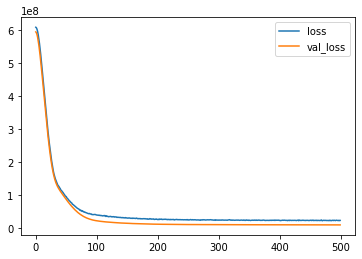

In [139]:
losses = pd.DataFrame(model.history.history)
losses.plot()